![Illustration of silhouetted heads](mentalhealth.jpg)

Does going to university in a different country affect your mental health? A Japanese international university surveyed its students in 2018 and published a study the following year that was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties than the general population, and that social connectedness (belonging to a social group) and acculturative stress (stress associated with joining a new culture) are predictive of depression.


Explore the `students` data using PostgreSQL to find out if you would come to a similar conclusion for international students and see if the length of stay is a contributing factor.

Here is a data description of the columns you may find helpful.

| Field Name    | Description                                      |
| ------------- | ------------------------------------------------ |
| `inter_dom`     | Types of students (international or domestic)   |
| `japanese_cate` | Japanese language proficiency                    |
| `english_cate`  | English language proficiency                     |
| `academic`      | Current academic level (undergraduate or graduate) |
| `age`           | Current age of student                           |
| `stay`          | Current length of stay in years                  |
| `todep`         | Total score of depression (PHQ-9 test)           |
| `tosc`          | Total score of social connectedness (SCS test)   |
| `toas`          | Total score of acculturative stress (ASISS test) |

In [31]:
-- Run this code to save the CSV file as students
SELECT * 
FROM 'students.csv';

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,5.0,High,None,Yes,No,No,No,0.0,Min,34.0,23.0,9.0,11.0,8.0,11.0,2.0,27.0,91.0,5.0,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,4.0,High,None,No,No,No,No,2.0,Min,48.0,8.0,7.0,5.0,4.0,3.0,2.0,10.0,39.0,7.0,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,4.0,High,Yes,Yes,No,No,No,2.0,Min,41.0,13.0,4.0,7.0,6.0,4.0,3.0,14.0,51.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,No,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,3.0,Average,No,No,No,No,No,3.0,Min,37.0,16.0,10.0,10.0,8.0,6.0,4.0,21.0,75.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,3.0,Average,Yes,No,No,No,No,3.0,Min,37.0,15.0,12.0,5.0,8.0,7.0,4.0,31.0,82.0,5.0,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,NaN,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,222,None,None,None,None,None,None,None,None,None
282,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,249,None,None,None,None,None,None,None,None,None
283,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,203,None,None,None,None,None,None,None,None,None
284,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,247,None,None,None,None,None,None,None,None,None


In [32]:
-- Counting records
SELECT COUNT(*) AS total_records
FROM 'students.csv'

,total_records
0,286


In [33]:
-- Grouping records
SELECT inter_dom, COUNT(*)
FROM 'students.csv'
GROUP BY inter_dom


,inter_dom,count_star()
0,Inter,201
1,Dom,67
2,None,18


In [34]:
-- Filtering records for International Students
SELECT *
FROM 'students.csv'
WHERE Inter_dom = 'Inter';


,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24,4,5,Long,3,Average,5,High,None,Yes,No,No,No,0,Min,34,23,9,11,8,11,2,27,91,5,5,6,3,2,1,4,1,3,4,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28,5,1,Short,4,High,4,High,None,No,No,No,No,2,Min,48,8,7,5,4,3,2,10,39,7,7,7,4,4,4,4,1,1,1,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25,4,6,Long,4,High,4,High,Yes,Yes,No,No,No,2,Min,41,13,4,7,6,4,3,14,51,3,3,3,1,1,2,1,1,1,1,NaN,No,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29,5,1,Short,2,Low,3,Average,No,No,No,No,No,3,Min,37,16,10,10,8,6,4,21,75,5,5,5,5,5,2,2,2,4,4,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28,5,1,Short,1,Low,3,Average,Yes,No,No,No,No,3,Min,37,15,12,5,8,7,4,31,82,5,5,5,2,5,2,5,5,4,4,NaN,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Inter,SEA,Male,Under,21,3,3,Medium,4,High,4,High,Yes,Yes,No,No,No,6,Mild,37,23,8,11,8,6,4,22,82,3,2,2,2,4,2,4,2,6,4,4.0,No,No,No,No,No,No,No,No,Yes,No,No
197,Inter,SEA,Female,Under,20,2,1,Short,2,Low,4,High,Yes,No,No,No,No,7,Mild,16,29,18,17,17,12,8,44,145,7,1,3,3,4,4,4,4,7,1,4.0,Yes,No,No,No,No,No,No,No,Yes,No,No
198,Inter,SEA,Female,Under,21,3,3,Medium,2,Low,5,High,Yes,No,No,Yes,Major,16,ModSev,25,24,11,17,4,11,6,37,110,5,7,3,1,6,1,6,1,4,1,3.0,Yes,Yes,No,No,Yes,No,Yes,No,No,No,No
199,Inter,SEA,Female,Under,18,1,1,Short,1,Low,4,High,No,No,No,No,No,8,Mild,38,11,12,10,4,7,4,20,68,5,5,4,3,3,3,3,3,5,5,5.0,Yes,Yes,No,No,No,No,No,No,Yes,Yes,Yes


In [45]:
-- Filtering records for Japanese Students
SELECT *
FROM 'students.csv'
WHERE Inter_dom = 'Dom';

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Dom,JAP,Female,Grad,27,5,2,Medium,3,Average,3,Average,Yes,Yes,No,Yes,Major,12,Mod,47,16,11,5,8,7,3,31,81,7,3,7,1,6,6,1,5,4,1,NaN,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,No
1,Dom,JAP,Female,Under,18,1,1,Short,5,High,3,Average,No,No,No,No,No,9,Mild,48,9,4,5,4,3,2,10,37,4,4,4,4,1,1,1,1,1,1,4.0,No,No,No,No,No,No,No,No,No,No,No
2,Dom,JAP,Female,Under,21,3,3,Medium,5,High,3,Average,Yes,No,No,No,No,7,Mild,40,16,8,10,8,6,4,20,72,6,6,7,1,1,1,5,1,1,1,4.0,Yes,Yes,Yes,No,No,No,Yes,No,No,No,No
3,Dom,JAP,Male,Under,20,2,3,Medium,5,High,1,Low,No,No,No,No,No,3,Min,47,11,4,5,4,5,2,12,43,1,5,5,3,1,1,3,1,1,1,3.0,No,Yes,Yes,No,No,No,No,No,No,No,No
4,Dom,JAP,Female,Under,21,3,3,Medium,5,High,1,Low,No,No,Yes,Yes,Other,10,Mod,48,8,4,5,4,3,2,10,36,7,5,7,1,1,1,1,1,1,1,1.0,Yes,Yes,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Dom,JAP,Female,Under,21,3,4,Long,5,High,4,High,No,Yes,No,No,No,8,Mild,27,16,9,10,8,7,4,20,74,1,7,5,1,3,3,3,1,1,1,6.0,No,Yes,Yes,No,No,No,No,No,No,No,Yes
63,Dom,JAP,Female,Under,22,3,3,Medium,3,Average,4,High,Yes,Yes,No,No,No,2,Min,48,8,10,5,4,3,4,16,50,7,7,7,7,2,2,2,2,2,1,3.0,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No
64,Dom,JAP,Female,Under,19,2,1,Short,5,High,3,Average,No,No,No,No,No,9,Mild,47,8,7,5,5,3,2,13,43,5,7,7,6,7,7,7,1,1,1,2.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
65,Dom,JAP,Male,Under,19,2,1,Short,5,High,3,Average,No,No,No,No,No,1,Min,43,8,12,5,4,3,2,10,44,7,5,7,5,5,5,5,4,4,4,2.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No


In [36]:
---- Filtering records for NULL
SELECT *
FROM 'students.csv'
WHERE Inter_dom IS NULL;

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,96,42,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145,128,137,66,61,30,46,19,65,21,45
2,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,172,54,NaN,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123,140,131,202,207,238,222,249,203,247,223
3,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,172,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145,128,137,66,61,30,46,19,65,21,45
5,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123,140,131,202,207,238,222,249,203,247,223
6,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None
7,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145,123,None,None,None,None,None,None,None,None,None
8,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,140,None,None,None,None,None,None,None,None,None
9,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,131,None,None,None,None,None,None,None,None,None


In [37]:
-- Summary statistics for PHQ-9 test
SELECT 
    ROUND(MIN(todep), 2) AS min_phq,
    ROUND(MAX(todep), 2) AS max_phq,
    ROUND(AVG(todep), 2) AS avg_phq
FROM 'students.csv';



,min_phq,max_phq,avg_phq
0,0.0,25.0,8.19


In [38]:
-- Summary statistics for SCS test
SELECT 
    ROUND(MIN(tosc), 2) AS min_scs,
    ROUND(MAX(tosc), 2) AS max_scs,
    ROUND(AVG(tosc), 2) AS avg_scs
FROM 'students.csv';

,min_scs,max_scs,avg_scs
0,8.0,48.0,37.47


In [39]:
-- Summary statistics for ASISS test
SELECT 
    ROUND(MIN(toas), 2) AS min_as,
    ROUND(MAX(toas), 2) AS max_as,
    ROUND(AVG(toas), 2) AS avg_as
FROM 'students.csv';


,min_as,max_as,avg_as
0,36.0,145.0,72.38


In [40]:
-- Summary statistics for PHQ-9 test for international students
SELECT 
    ROUND(MIN(todep), 2) AS min_phq,
    ROUND(MAX(todep), 2) AS max_phq,
    ROUND(AVG(todep), 2) AS avg_phq
FROM 'students.csv'
WHERE Inter_dom = 'Inter';

,min_phq,max_phq,avg_phq
0,0.0,25.0,8.04


In [41]:

-- Summary statistics for SCS test for international students
SELECT 
    ROUND(MIN(tosc), 2) AS min_scs,
    ROUND(MAX(tosc), 2) AS max_scs,
    ROUND(AVG(tosc), 2) AS avg_scs
FROM 'students.csv'
WHERE Inter_dom = 'Inter';

,min_scs,max_scs,avg_scs
0,11.0,48.0,37.42


In [42]:
-- Summary statistics for ASISS test for international students
SELECT 
    ROUND(MIN(toas), 2) AS min_as,
    ROUND(MAX(toas), 2) AS max_as,
    ROUND(AVG(toas), 2) AS avg_as
FROM 'students.csv'
WHERE Inter_dom = 'Inter';

,min_as,max_as,avg_as
0,36.0,145.0,75.56


In [43]:
-- Find the average scores by length of stay for international students, and view them in descending order
SELECT stay, 
       ROUND(AVG(todep), 2) AS average_phq, 
       ROUND(AVG(tosc), 2) AS average_scs, 
       ROUND(AVG(toas), 2) AS average_as
FROM 'students.csv'
WHERE inter_dom = 'Inter'
GROUP BY stay
ORDER BY stay DESC;

,stay,average_phq,average_scs,average_as
0,10,13.00,32.00,50.00
1,8,10.00,44.00,65.00
2,7,4.00,48.00,45.00
3,6,6.00,38.00,58.67
4,5,0.00,34.00,91.00
5,4,8.57,33.93,87.71
6,3,9.09,37.13,78.00
7,2,8.28,37.08,77.67
8,1,7.48,38.11,72.80


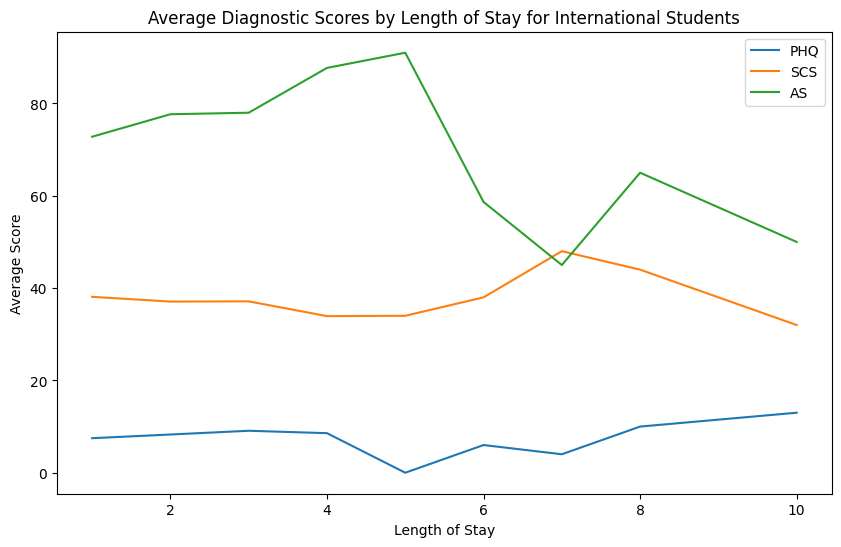

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('students.csv')

# Filter for international students
df_international = df[df['inter_dom'] == 'Inter']

# Group by 'stay' and calculate average diagnostic scores
df_grouped = df_international.groupby('stay').agg({
    'todep': 'mean',
    'tosc': 'mean',
    'toas': 'mean'
}).round(2)

# Plot the average diagnostic scores against length of stay
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped['todep'], label='PHQ')
plt.plot(df_grouped.index, df_grouped['tosc'], label='SCS')
plt.plot(df_grouped.index, df_grouped['toas'], label='AS')
plt.xlabel('Length of Stay')
plt.ylabel('Average Score')
plt.title('Average Diagnostic Scores by Length of Stay for International Students')
plt.legend()
plt.show()
